### Importing libraries

In [145]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,roc_auc_score
import random
from sklearn import metrics
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [29]:
df = pd.read_csv("Group_15_cleaned_processed.csv")

In [30]:
df.drop(['Unnamed: 0','label','address'] , axis = 1, inplace = True)

In [31]:
df['Label-0/1'].value_counts()

0.0    2875284
1.0      41413
Name: Label-0/1, dtype: int64

<AxesSubplot:xlabel='Label-0/1', ylabel='count'>

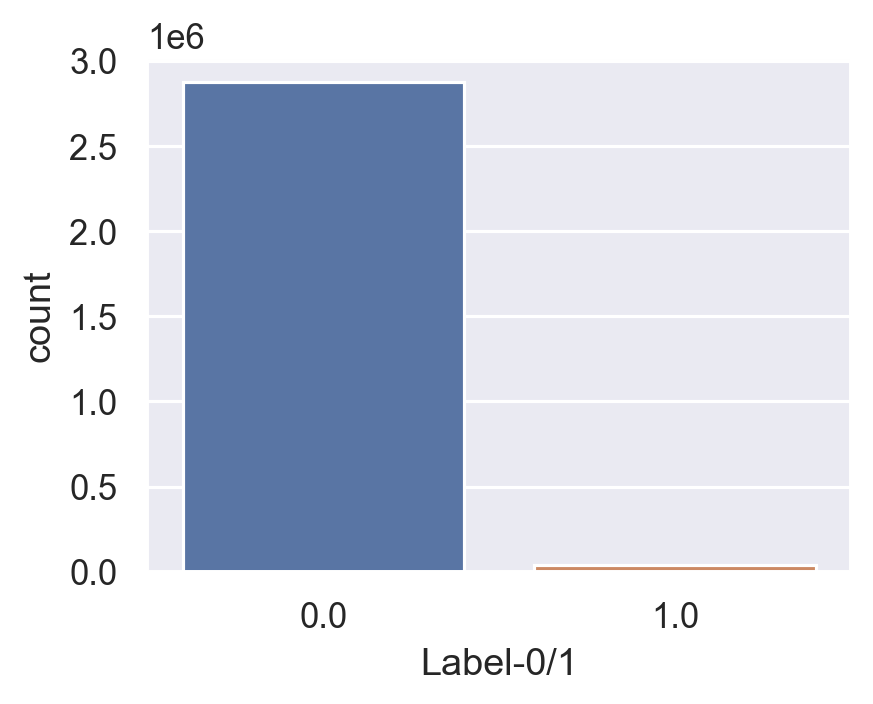

In [156]:
sns.countplot(x='Label-0/1',data=df)

In [32]:
df.columns

Index(['year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors',
       'income', 'Label-0/1', 'n_address', 'gaussian_income',
       'gaussian_neighbors', 'gaussian_weight', 'gaussian_length', 'log_count',
       'sigmoid_looped', 'interaction_count_income', 'day_of_week',
       'quarter_number', 'interaction_length_weight'],
      dtype='object')

In [33]:
df_new = df[['Label-0/1', 'n_address', 'gaussian_income',
       'gaussian_neighbors', 'gaussian_weight', 'gaussian_length', 'log_count',
       'sigmoid_looped', 'interaction_count_income', 'day_of_week',
       'quarter_number', 'interaction_length_weight']]

In [34]:
df_new.head()

,Label-0/1,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight
0,1.0,0.0,4.117890,5.841922e-01,-3.193848,-0.015776,9.999995e-07,0.5,2.0,2.0,1.0,1.0
1,1.0,0.0,4.117884,9.999992e-07,-4.281714,-0.103159,9.999995e-07,0.5,2.0,2.0,2.0,1.0
2,1.0,0.0,4.125572,5.841922e-01,0.000000,-0.895270,9.999995e-07,0.5,2.0,4.0,3.0,2.0
3,1.0,0.0,4.113622,5.841922e-01,-3.489562,-0.321544,9.999995e-07,0.5,2.0,3.0,4.0,1.0
4,1.0,0.0,4.125572,9.999992e-07,-2.082769,-0.835088,6.122493e+00,0.5,0.0,3.0,3.0,1.0


In [35]:
positive_df = df_new[df_new['Label-0/1'] == 1]
negative_df = df_new[df_new['Label-0/1'] == 0]

In [36]:
negative_df.shape

(2875284, 12)

In [37]:
positive_df.shape

(41413, 12)

### Random sampling of 0's.
* The dataset being huge we are considering only a few rows for our project

In [38]:
df_new_  = negative_df.sample(414130)

In [39]:
df_new_.shape

(414130, 12)

In [40]:
df_1 = pd.concat([df_new_, positive_df], ignore_index=True)

In [41]:
df_1.shape

(455543, 12)

In [42]:
X = df_1.drop(['Label-0/1'] , axis = 1)
y = df_1['Label-0/1']

### Oversampling of 1's

In [43]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [44]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [45]:
X_over, y_over = oversample.fit_resample(X, y)

In [48]:
X_over.shape

(828260, 11)

In [49]:
y_over.value_counts()

0.0    414130
1.0    414130
Name: Label-0/1, dtype: int64

In [50]:
df1  = pd.concat([X_over,y_over] , axis = 1)

<AxesSubplot:xlabel='Label-0/1', ylabel='count'>

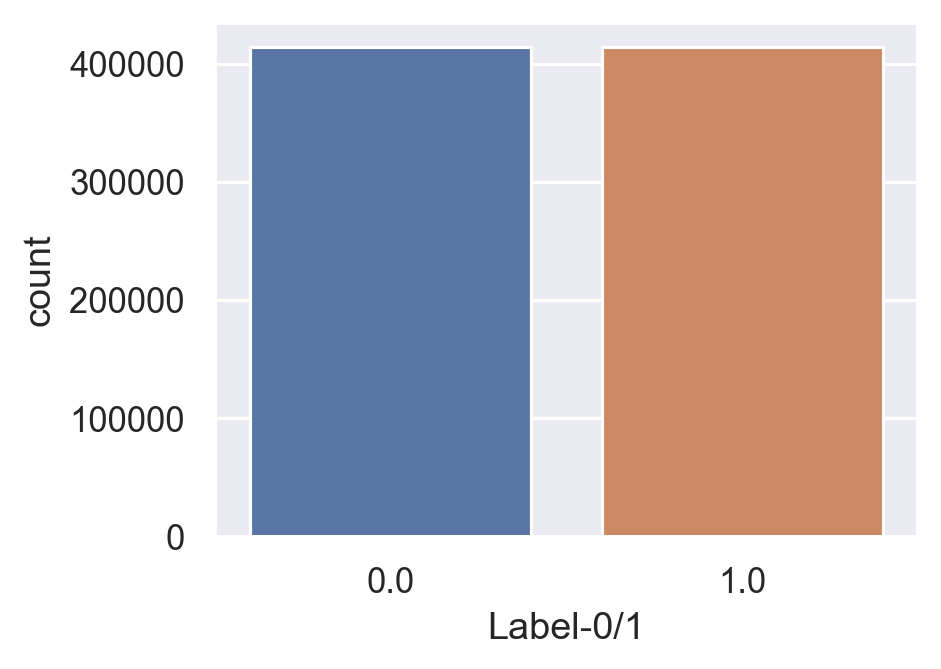

In [157]:

sns.countplot(x='Label-0/1',data=df1)

In [51]:
df1.head()

,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight,Label-0/1
0,0.000000,4.125821,5.841922e-01,-2.620933,-0.835088,7.758761e+00,0.500000,0.0,3.0,4.0,1.0,0.0
1,0.000000,4.117595,9.999992e-07,-4.461447,-0.835088,8.335192e+00,0.500000,1.0,2.0,1.0,1.0,0.0
2,0.000000,4.144176,5.841922e-01,-2.915540,-0.015776,9.999995e-07,0.500000,2.0,0.0,3.0,1.0,0.0
3,0.040003,4.133959,9.999992e-07,0.281405,-0.835088,6.837333e+00,1.000000,0.0,6.0,1.0,0.0,0.0
4,0.000000,4.129678,5.841922e-01,-1.907035,-0.034032,2.484907e+00,0.999994,0.0,5.0,1.0,1.0,0.0


In [52]:
X_train, X_test,y_train, y_test = train_test_split(X_over,y_over,test_size=0.2,shuffle=True)

### Naive Classifier - Random Model

In [117]:
class RandomModel():
    
    def predict(self, X):
        #predict class labels randomly
        
        y_pred = np.array([])
        for data_point in tqdm(range(X.shape[0])):
            if np.random.uniform(0, 1) >= 0.5:
                y_pred = np.append(y_pred, 1)
            else:
                y_pred = np.append(y_pred, 0)
        return y_pred

In [118]:
random_model = RandomModel()
random_pred = random_model.predict(X_train)

  0%|          | 0/662608 [00:00<?, ?it/s]

In [119]:
acc = accuracy_score(y_train,random_pred)
print("The accuracy of the random model is ", acc*100)

The accuracy of the random model is  49.90854321106899


In [120]:
print("The recall score for the applied algorithm",recall_score(y_train,random_pred))

The recall score for the applied algorithm 0.49891644884974556


In [183]:
cm_r = confusion_matrix(y_train, random_pred)

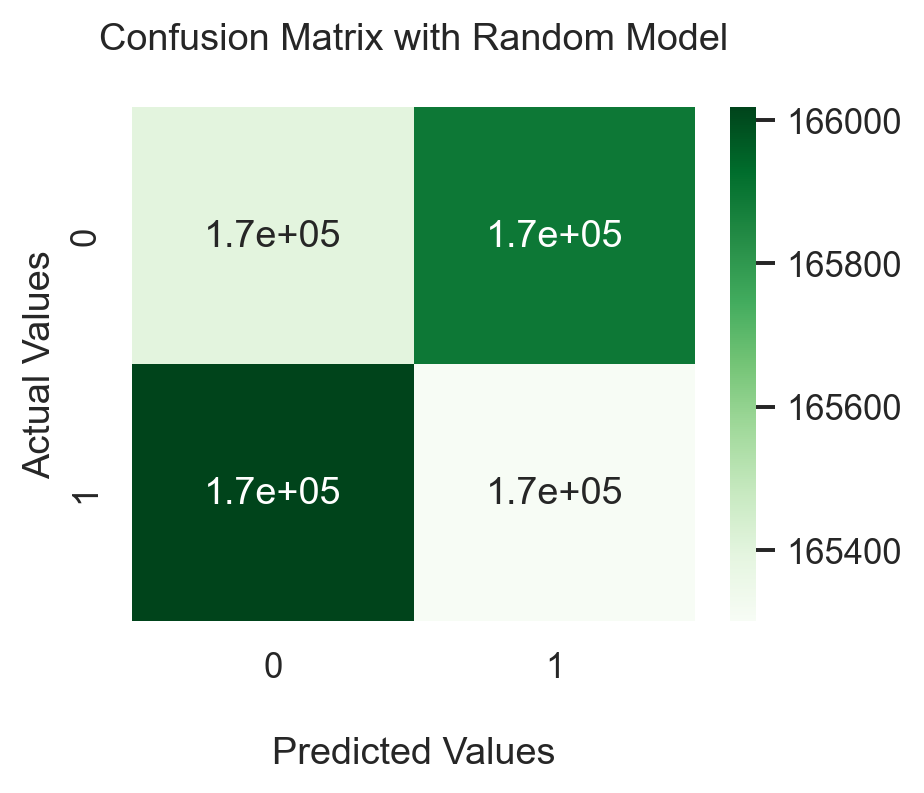

In [185]:
ax = sns.heatmap(cm_r, annot=True, cmap='Greens')

ax.set_title('Confusion Matrix with Random Model\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Display the visualization of the Confusion Matrix.
plt.show()

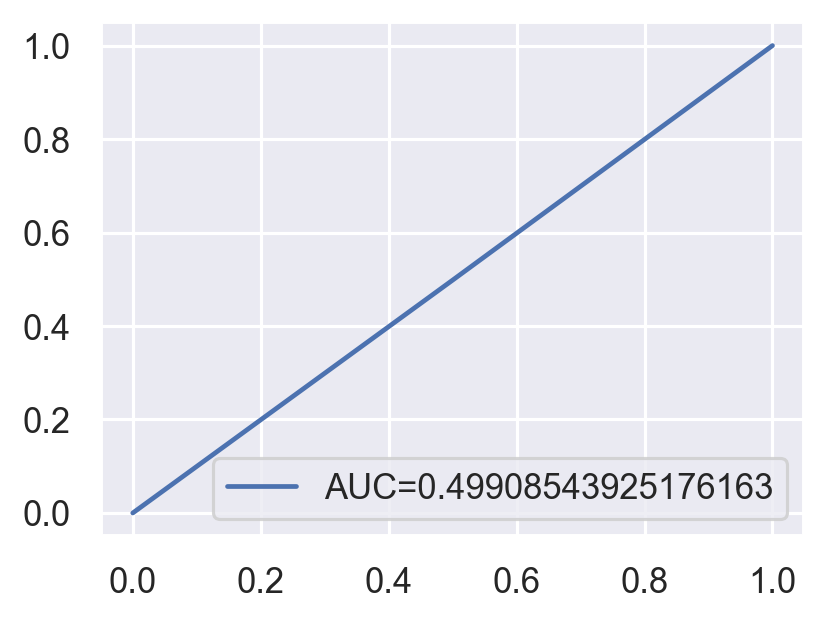

In [158]:
auc = metrics.roc_auc_score(y_train,random_pred)
fpr, tpr, _ = metrics.roc_curve(y_train, random_pred)
plt.plot(fpr, tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### Linear regression with Gradient Descent

In [53]:
def robbins_monro_decay(learning_rate,
                        global_step,
                        decay_steps,
                        decay_rate,
                        staircase=False,
                        name=None):
    """A Robbins-Monro type decay"""

    if global_step is None:
        raise ValueError("global_step is required for robbins_monro_decay.")

    with tf.name_scope("RobbinsMonroDecay") as name:

        learning_rate = tf.convert_to_tensor(learning_rate, name="learning_rate")
        dtype = learning_rate.dtype
        decay_steps = tf.cast(decay_steps, dtype)
        decay_rate = tf.cast(decay_rate, dtype)
        global_step = tf.cast(global_step, dtype)
        p = global_step / decay_steps

        if staircase:
            p = tf.floor(p)

        return tf.multiply(learning_rate,tf.pow(p + 1,-decay_rate), name=name)

In [174]:
class Linear_regression:
    def __init__(self,learning_rate = 0.0001,iterations=100):
        self.alpha=learning_rate
        self.epoch=iterations
        
    def fit(self,X,y):
        m = X.shape[0]  # number of samples
        ones = np.ones((m,1))  
        X = np.concatenate((ones, X), axis=1)
        n = X.shape[1]   
        vector = []
        for i in range(n):
            vector.append(np.random.normal(0,1))
        self.Theta = np.array(vector) #Assigning with random parameters
        h = np.dot(X, self.Theta)   # Compute hypothesis
        self.MSE = np.ones(self.epoch)
        self.alpha_s = np.ones(self.epoch)
  # Gradient descent algorithm
        self.cost = np.ones(self.epoch)
        for i in range (0, self.epoch):
            self.alpha = robbins_monro_decay(self.alpha,self.epoch-i,100,0.5)
            self.alpha_s[i]=self.alpha
            self.Theta[0] = self.Theta[0] - (self.alpha / X.shape[0]) * sum(h-y)
            for j in range(1, n):
                self.Theta[j]= self.Theta[j] - (self.alpha/ X.shape[0]) * sum((h-y) * X[:, j])
            h = np.dot(X, self.Theta)
            self.cost[i] = 1/(2*m) * sum(np.square(h-y))# Compute Cost
            self.MSE[i] = metrics.mean_squared_error(h,y)
    
        
    def predict_lr(self,X):
        X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
        h = np.dot(X, self.Theta)
        
        for i in range(0,len(h)):
            if (h[i] <= 0.5):
                h[i] = 0
            else:
                h[i]=1
        
        return h,self.MSE

In [175]:
lr = Linear_regression()

In [176]:
lr.fit(X_train,y_train)

In [177]:
y_pred, MSE = lr.predict_lr(X_train)

In [178]:
cm = confusion_matrix(y_train, y_pred)

In [179]:
print(cm)

[[247086  84204]
 [228759 102559]]


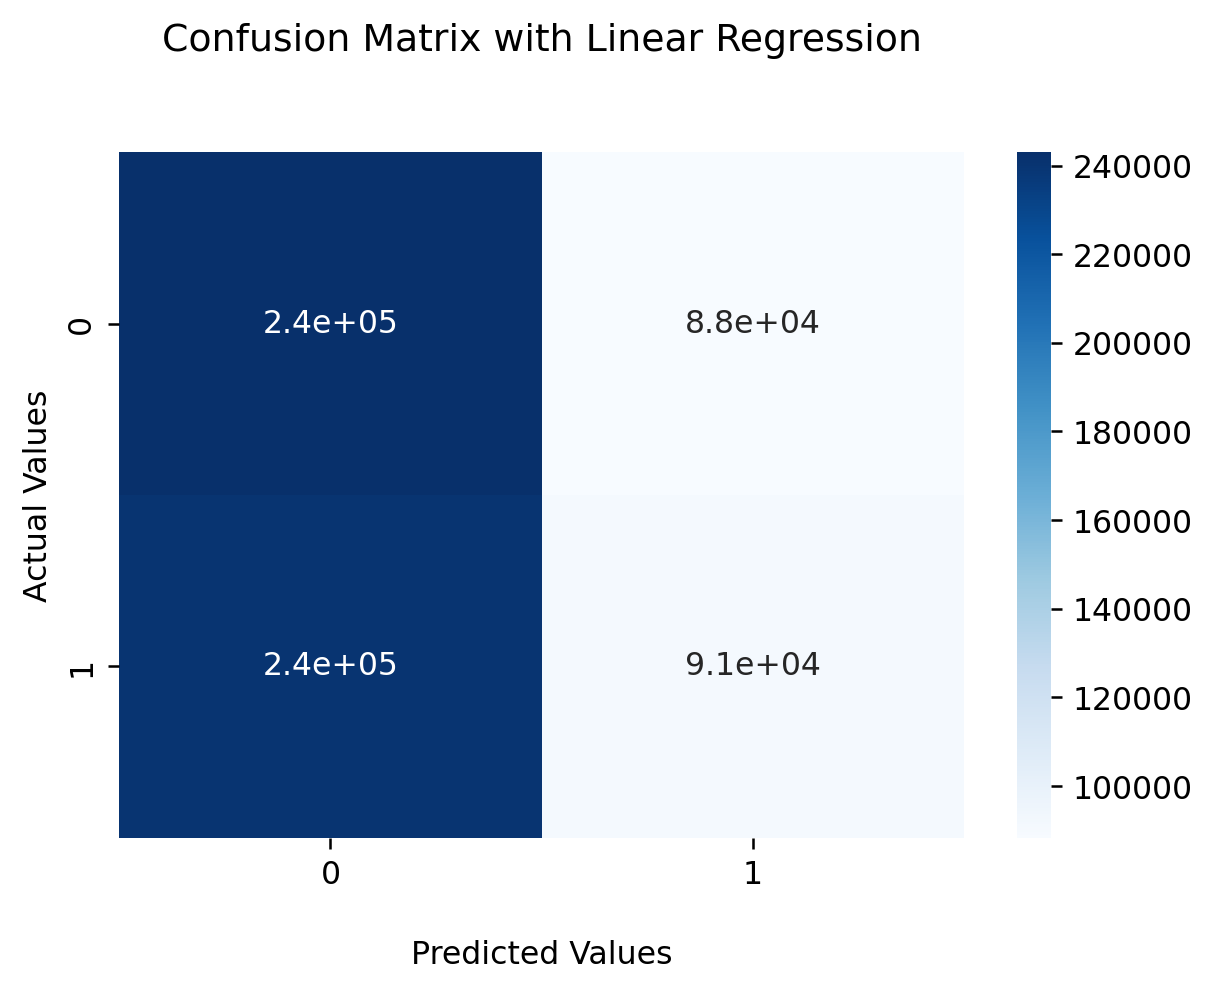

In [93]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with Linear Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Display the visualization of the Confusion Matrix.
plt.show()

### Results of the algorithm 

In [180]:
acc = accuracy_score(y_train,y_pred)
print("The accuracy of the model is ", acc*100)

The accuracy of the model is  52.768001593702465


In [181]:
print("The recall score for the applied algorithm",recall_score(y_train,y_pred))

The recall score for the applied algorithm 0.3095485304148884


In [187]:
min(MSE)

57.53425577758572

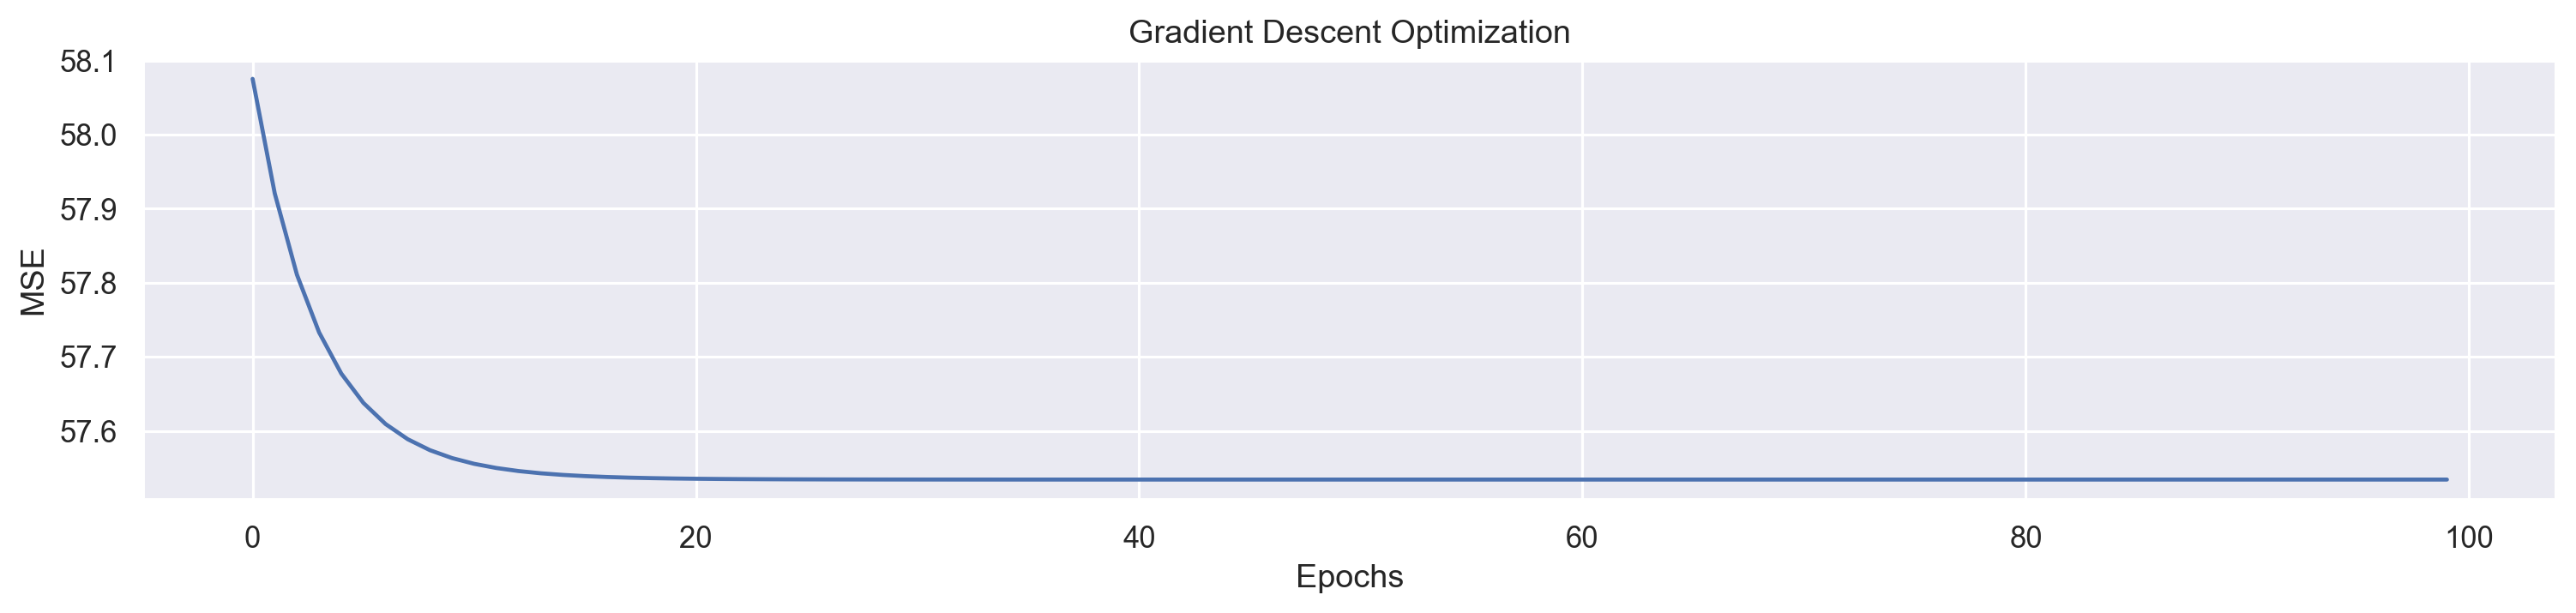

In [182]:
plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(MSE)), MSE)
plt.title('Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [27]:
df1.to_csv('Group_15_Resampled_Data.csv')